<a href="https://www.kaggle.com/code/hoshimmardonov1/avia-chipta-bashorati?scriptVersionId=126647660" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics 

<h1>Avia chipta narxlarini bashorat qilish</h1>

Datasetlarni yuklab olamiz

In [2]:
training_set = pd.read_csv("/kaggle/input/aviachipta-narxini-bashorat-qilish/train_data.csv")
test_set = pd.read_csv("/kaggle/input/aviachipta-narxini-bashorat-qilish/test_data.csv")

Datasetlarni o'qiymiz


In [3]:
training_set.head(5)

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


Data set bo'yicha umumiy ma'lumotlarni chiqaramiz

In [4]:
# Qatorlar sonini tekshirish
print("\n\nDatasetlarning qatorlar soni :\n",'#' * 40)

print("\nTraining Set : ",len(training_set))
print("Test Set : ",len(test_set))

# Datasetlarning ustunlar sonini tekshirish
print("\n\nDatasetlarning ustunlar soni :\n",'#' * 40)

print("\nTraining Set : ",len(training_set.columns))
print("Test Set : ",len(test_set.columns))

# Datasetning ustunlari nomini tekshirish
print("\n\nDatasetning ustunlari nomi :\n",'#' * 40)

print("\nTraining Set : ", list(training_set.columns))
print("Test Set : ",list(test_set.columns))

# Data setlarning ustunlari data turini tekshirish
print("\n\nDataset ustunlari turi :\n",'#' * 40)

print("\nTraining Set : ", training_set.dtypes)
print("\nTest Set : ",test_set.dtypes)

# NaN qiymat yoki bo'sh yachaykalarni tekshirish
print("\n\nNaN qiymat yoki bo'sh yachaykalar :\n",'#' * 40)

print("\nTraining Set : ",training_set.isnull().values.any())
print("\nTest Set : ",test_set.isnull().values.any())

#Dataset umumiy ma'lumotlari
print("\n\nInfo:\n",'#' * 40)

training_set.info()



Datasetlarning qatorlar soni :
 ########################################

Training Set :  20000
Test Set :  5000


Datasetlarning ustunlar soni :
 ########################################

Training Set :  12
Test Set :  11


Datasetning ustunlari nomi :
 ########################################

Training Set :  ['id', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']
Test Set :  ['id', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left']


Dataset ustunlari turi :
 ########################################

Training Set :  id                    int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left         

<h2>Kategorikal ustunlarni ajratish</h2>

In [5]:
print(f"Raqamli ustunlar: \n {training_set.select_dtypes(['int','float']).columns} \n")
print(f"Harfli ustunlar: \n {training_set.select_dtypes('object').columns}")

Raqamli ustunlar: 
 Index(['id', 'duration', 'days_left', 'price'], dtype='object') 

Harfli ustunlar: 
 Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')


<h3>Harfli ustunlardagi takrorlanmas qiymatlarni ajratish</h3>

In [6]:
airlines = list(training_set.airline) + list(test_set.airline)

flights = list(training_set.flight) + list(test_set.flight)

source_cities = list(training_set.source_city) + list(test_set.source_city)

departure_times = list(training_set.departure_time) + list(test_set.departure_time)

stops = list(training_set.stops) + list(test_set.stops)

arrival_times = list(training_set.arrival_time) + list(test_set.arrival_time)

destination_cities = list(training_set.destination_city) + list(test_set.destination_city)

classes = list(training_set['class']) + list(test_set['class'])



print("\nAirlanes ustunidagi jami takrorlanmas qymatlar soni  : \n ", len(set(airlines)))
print("\nAirlanes ustunidagi  takrorlanmas qymatlar  : \n ", set(airlines))

print("\nFlights ustunidagi jami takrorlanmas qymatlar soni: \n ", len(set(flights)))
# print("\nTFlights ustunidagi takrorlanmas qymatlar : \n ", set(flights) )

print("\nSource_cities ustunidagi jami takrorlanmas qymatlar soni : \n ", len(set(source_cities)))
print("\nSource_cities ustunidagi  takrorlanmas qymatlar : \n ", set(source_cities) )

print("\nDeparture_time ustunidagi jami takrorlanmas qymatlar soni : \n ", len(set(departure_times)))
print("\nDeparture_time ustunidagi takrorlanmas qymatlar : \n ", set(departure_times) )

print("\nStops ustunidagi jami takrorlanmas qymatlar soni : \n ", len(set(stops)))
print("\nStops ustunidagi  takrorlanmas qymatlar : \n ", set(stops) )

print("\nArrival_time ustunidagi jami takrorlanmas qymatlar soni : \n ", len(set(arrival_times)))
print("\nArrival_time ustunidagi  takrorlanmas qymatlar : \n ", set(arrival_times) )

print("\nDestination_citiy ustunidagi jami takrorlanmas qymatlar soni : \n ", len(set(destination_cities)))
print("\nDestination_citiy ustunidagi  takrorlanmas qymatlar : \n ", set(destination_cities) )

print("\nClass ustunidagi jami takrorlanmas qymatlar soni : \n ", len(set(classes)))
print("\nClass ustunidagi  takrorlanmas qymatlar : \n ", set(classes) )


Airlanes ustunidagi jami takrorlanmas qymatlar soni  : 
  6

Airlanes ustunidagi  takrorlanmas qymatlar  : 
  {'Air_India', 'SpiceJet', 'Vistara', 'AirAsia', 'GO_FIRST', 'Indigo'}

Flights ustunidagi jami takrorlanmas qymatlar soni: 
  1345

Source_cities ustunidagi jami takrorlanmas qymatlar soni : 
  6

Source_cities ustunidagi  takrorlanmas qymatlar : 
  {'Delhi', 'Hyderabad', 'Chennai', 'Bangalore', 'Kolkata', 'Mumbai'}

Departure_time ustunidagi jami takrorlanmas qymatlar soni : 
  6

Departure_time ustunidagi takrorlanmas qymatlar : 
  {'Night', 'Late_Night', 'Early_Morning', 'Evening', 'Afternoon', 'Morning'}

Stops ustunidagi jami takrorlanmas qymatlar soni : 
  3

Stops ustunidagi  takrorlanmas qymatlar : 
  {'zero', 'two_or_more', 'one'}

Arrival_time ustunidagi jami takrorlanmas qymatlar soni : 
  6

Arrival_time ustunidagi  takrorlanmas qymatlar : 
  {'Night', 'Late_Night', 'Early_Morning', 'Evening', 'Afternoon', 'Morning'}

Destination_citiy ustunidagi jami takrorlanmas 

<h3>Stops ustunini sonli qiymatlarga hamda datasetdagi boshqa qiymatlarni sonli qiymatlarga almashtirishga harakata qilamiz.
    Bunda faqatgina departure_times ustunidagi ma'lumotlarni sonli qiymatlarga almashtirmaymiz.
Sababi samolyotni uchib ketish vaqti price ustuniga bog'liqligi kuchli bo'lishi mumkin degan taxmin asosida mazkur ustunni boshqa yo'l bilan raqamli qiymatlarga almashtiramiz</h3>

In [7]:
lugat = {'Bangalore':1, 'Delhi':2, 'Chennai':3, 'Mumbai':4, 'Hyderabad':5, 'Kolkata':6}

In [8]:
training_set['stops'] = training_set['stops'].replace("zero",0)
training_set['stops'] = training_set['stops'].replace("one",1)
training_set['stops'] = training_set['stops'].replace("two_or_more",2)
training_set['class'] = training_set['class'].replace("Economy",1)
training_set['class'] = training_set['class'].replace("Business",2)
training_set['arrival_time'] = pd.Categorical(training_set['arrival_time']).codes
training_set['airline'] = pd.Categorical(training_set['airline']).codes


Machine Learningda ahamiyatga ega bo'lmagan ustunlarni tashlab yuboramiz(ya'ni id va flight ustunlarini)

In [9]:
training_set.drop(['id','flight'], axis=1, inplace=True)

In [10]:
training_set

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,5,Bangalore,Early_Morning,1,5,Mumbai,1,14.25,21,7212
1,4,Hyderabad,Evening,0,5,Kolkata,1,1.75,7,5292
2,5,Bangalore,Morning,1,2,Delhi,2,9.58,5,60553
3,5,Kolkata,Morning,1,2,Hyderabad,1,6.75,28,5760
4,3,Chennai,Early_Morning,0,4,Mumbai,1,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...
19995,3,Bangalore,Night,1,1,Mumbai,1,7.92,45,3153
19996,0,Kolkata,Morning,1,0,Delhi,1,5.83,24,3911
19997,5,Chennai,Early_Morning,2,2,Bangalore,1,35.33,17,14822
19998,5,Mumbai,Evening,1,4,Bangalore,1,16.33,21,6450


<h3>Avia chipta narxi shaharlarning havo yo'llari o'rtasidagi masofalarga bog'liq bo'lishi mumkin degan taxmin bilan shaharlar orasidagi masofalarni alohida ustunga qo'yib chiqamiz.</h3>

In [11]:
training_set['distance_between_cities'] = np.where((training_set['source_city'] == 'Bangalore') & (training_set['destination_city'] == 'Hyderabad'), 497, 
                                           np.where((training_set['source_city'] == 'Bangalore') & (training_set['destination_city'] == 'Kolkata'), 1561,
                                           np.where((training_set['source_city'] == 'Bangalore') & (training_set['destination_city'] == 'Chennai'), 284,
                                           np.where((training_set['source_city'] == 'Bangalore') & (training_set['destination_city'] == 'Delhi'), 1741,
                                           np.where((training_set['source_city'] == 'Bangalore') & (training_set['destination_city'] == 'Mumbai'), 837,
                                           
                                           np.where((training_set['source_city'] == 'Hyderabad') & (training_set['destination_city'] == 'Kolkata'), 1184,
                                           np.where((training_set['source_city'] == 'Hyderabad') & (training_set['destination_city'] == 'Chennai'), 511,
                                           np.where((training_set['source_city'] == 'Hyderabad') & (training_set['destination_city'] == 'Delhi'), 1259,
                                           np.where((training_set['source_city'] == 'Hyderabad') & (training_set['destination_city'] == 'Mumbai'), 623,
                                           np.where((training_set['source_city'] == 'Hyderabad') & (training_set['destination_city'] == 'Bangalore'), 497,
                                                    
                                           np.where((training_set['source_city'] == 'Kolkata') & (training_set['destination_city'] == 'Chennai'), 1363,
                                           np.where((training_set['source_city'] == 'Kolkata') & (training_set['destination_city'] == 'Delhi'), 1304,
                                           np.where((training_set['source_city'] == 'Kolkata') & (training_set['destination_city'] == 'Mumbai'), 1664,
                                           np.where((training_set['source_city'] == 'Kolkata') & (training_set['destination_city'] == 'Bangalore'), 1561,
                                           np.where((training_set['source_city'] == 'Kolkata') & (training_set['destination_city'] == 'Hyderabad'), 1184,        
        
                                           np.where((training_set['source_city'] == 'Chennai') & (training_set['destination_city'] == 'Delhi'), 1757,
                                           np.where((training_set['source_city'] == 'Chennai') & (training_set['destination_city'] == 'Mumbai'), 1025,
                                           np.where((training_set['source_city'] == 'Chennai') & (training_set['destination_city'] == 'Kolkata'), 1363,         
                                           np.where((training_set['source_city'] == 'Chennai') & (training_set['destination_city'] == 'Hyderabad'), 511,         
                                           np.where((training_set['source_city'] == 'Chennai') & (training_set['destination_city'] == 'Bangalore'), 284,         
                                                    
                                           np.where((training_set['source_city'] == 'Delhi') & (training_set['destination_city'] == 'Mumbai'), 1163,
                                           np.where((training_set['source_city'] == 'Delhi') & (training_set['destination_city'] == 'Chennai'), 1757,
                                           np.where((training_set['source_city'] == 'Delhi') & (training_set['destination_city'] == 'Kolkata'), 1304,
                                           np.where((training_set['source_city'] == 'Delhi') & (training_set['destination_city'] == 'Hyderabad'), 1259,
                                           np.where((training_set['source_city'] == 'Delhi') & (training_set['destination_city'] == 'Bangalore'), 1741,         
                                                    
                                           np.where((training_set['source_city'] == 'Mumbai') & (training_set['destination_city'] == 'Delhi'), 1163,
                                           np.where((training_set['source_city'] == 'Mumbai') & (training_set['destination_city'] == 'Chennai'), 1025,
                                           np.where((training_set['source_city'] == 'Mumbai') & (training_set['destination_city'] == 'Kolkata'), 1664,
                                           np.where((training_set['source_city'] == 'Mumbai') & (training_set['destination_city'] == 'Hyderabad'), 623,
                                           np.where((training_set['source_city'] == 'Mumbai') & (training_set['destination_city'] == 'Bangalore'), 837,0
                                                   ))))))))))))))))))))))))))))))

In [12]:
training_set

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,distance_between_cities
0,5,Bangalore,Early_Morning,1,5,Mumbai,1,14.25,21,7212,837
1,4,Hyderabad,Evening,0,5,Kolkata,1,1.75,7,5292,1184
2,5,Bangalore,Morning,1,2,Delhi,2,9.58,5,60553,1741
3,5,Kolkata,Morning,1,2,Hyderabad,1,6.75,28,5760,1184
4,3,Chennai,Early_Morning,0,4,Mumbai,1,2.00,4,10712,1025
...,...,...,...,...,...,...,...,...,...,...,...
19995,3,Bangalore,Night,1,1,Mumbai,1,7.92,45,3153,837
19996,0,Kolkata,Morning,1,0,Delhi,1,5.83,24,3911,1304
19997,5,Chennai,Early_Morning,2,2,Bangalore,1,35.33,17,14822,284
19998,5,Mumbai,Evening,1,4,Bangalore,1,16.33,21,6450,837


Shaharlarniyam kategoriyaga bo'lib olamiz

In [13]:
training_set['source_city'] = training_set['source_city'].map(lugat)
training_set['destination_city'] = training_set['destination_city'].map(lugat)

Birortasini tekshirib ko'ramiz

In [14]:
training_set

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,distance_between_cities
0,5,1,Early_Morning,1,5,4,1,14.25,21,7212,837
1,4,5,Evening,0,5,6,1,1.75,7,5292,1184
2,5,1,Morning,1,2,2,2,9.58,5,60553,1741
3,5,6,Morning,1,2,5,1,6.75,28,5760,1184
4,3,3,Early_Morning,0,4,4,1,2.00,4,10712,1025
...,...,...,...,...,...,...,...,...,...,...,...
19995,3,1,Night,1,1,4,1,7.92,45,3153,837
19996,0,6,Morning,1,0,2,1,5.83,24,3911,1304
19997,5,3,Early_Morning,2,2,1,1,35.33,17,14822,284
19998,5,4,Evening,1,4,1,1,16.33,21,6450,837


<h2><b>Flight Deck Friend</b> ma'lumotlariga ko'ra, aksariyat tijorat samolyotlari odatda soatiga <i>460-575 milya</i> yoki <b>740-930 km / soat </b> tezlikda uchadi.</h2>

Endigi navbat to'xtashlarsiz (yani **training_set.stops == 0**)parvoz davomiyligi bilan shaharlar o'rtasidagi bog'liqlikni grafik yordamida chizamiz

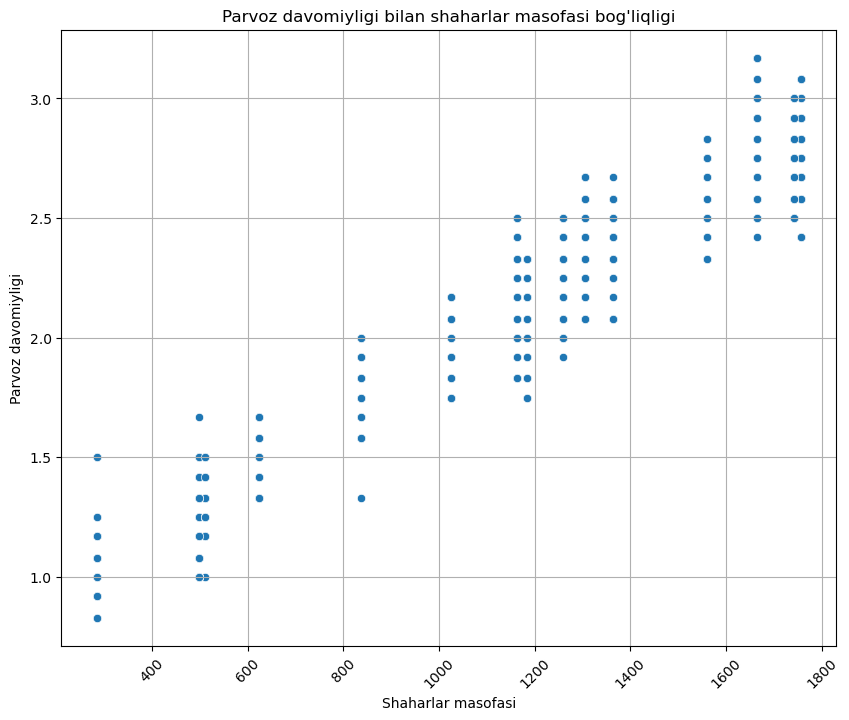

In [15]:
df = training_set[training_set['stops'] == 0]
plt.figure(figsize=(10,8))

sns.scatterplot(x=df['distance_between_cities'], y=df['duration'])

plt.title("Parvoz davomiyligi bilan shaharlar masofasi bog'liqligi")
plt.xlabel("Shaharlar masofasi")
plt.ylabel("Parvoz davomiyligi")
plt.grid() # Chizmaga gorizontal va vertikal chiziqlar (setka) qo'shish
plt.xticks(rotation=45)
plt.show()

Ushbu grafikdan ko'rishimiz mumkinki masofa ortib borgan sari parvoz davomiyligi ham ortgan, yani noodatiy qiymatlarimiz yo'q desak ham bo'ladi

Endi ustunlar orasidagi bog'liqlikni topishga harakat qilamiz

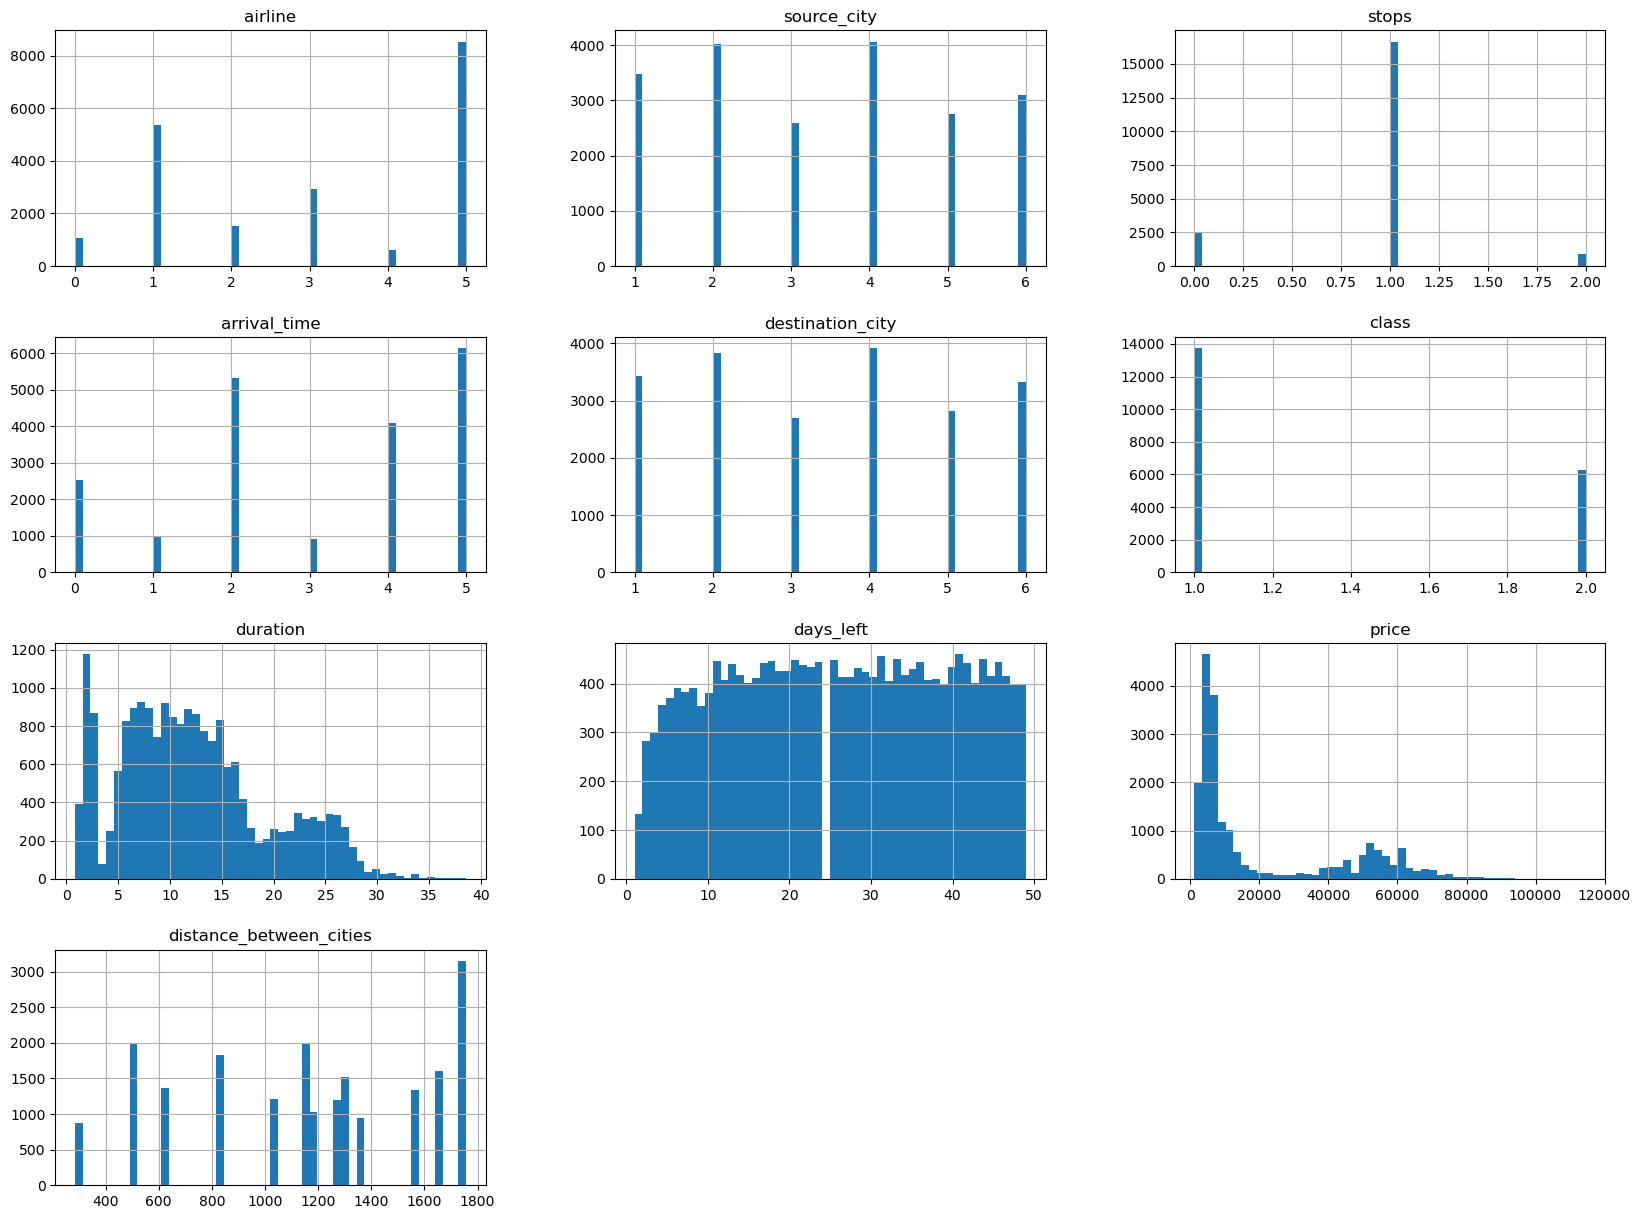

In [16]:
%matplotlib inline
training_set.hist(bins=50, figsize=(20,15))
plt.show()

Ko'rib turganimizdek ma'lumotlarimiz notekis taqimlangan ekan.

<h3>Korrelatsiya</h3>

In [17]:
corr_matrix = training_set.corr().abs()
corr_matrix.style.background_gradient(cmap='Greens')

,airline,source_city,stops,arrival_time,destination_city,class,duration,days_left,price,distance_between_cities
airline,1.000000,0.003154,0.006034,0.036642,0.003732,0.174770,0.008702,0.024465,0.241193,0.047684
source_city,0.003154,1.000000,0.037680,0.038277,0.193249,0.014072,0.045490,0.002138,0.004187,0.015965
stops,0.006034,0.037680,1.000000,0.005380,0.059501,0.000567,0.470493,0.003238,0.121455,0.017275
arrival_time,0.036642,0.038277,0.005380,1.000000,0.038540,0.035101,0.011622,0.010408,0.046801,0.041078
destination_city,0.003732,0.193249,0.059501,0.038540,1.000000,0.008113,0.093386,0.012308,0.030006,0.012920
class,0.174770,0.014072,0.000567,0.035101,0.008113,1.000000,0.144831,0.022332,0.937868,0.037520
duration,0.008702,0.045490,0.470493,0.011622,0.093386,0.144831,1.000000,0.020091,0.213158,0.044379
days_left,0.024465,0.002138,0.003238,0.010408,0.012308,0.022332,0.020091,1.000000,0.102545,0.014048
price,0.241193,0.004187,0.121455,0.046801,0.030006,0.937868,0.213158,0.102545,1.000000,0.023521
distance_between_cities,0.047684,0.015965,0.017275,0.041078,0.012920,0.037520,0.044379,0.014048,0.023521,1.000000


Ko'rib turganimizdek price ustuni bilan class, airline, stops, duration, days_left ustunlari orasida sezilarli; qolgan ustunlar orasida esa bir oz bo'lsada korrelatsiya mavjud ekan.

Endi parametr(x)lar va label(y)larni ajratib olamiz

In [18]:
data = training_set[['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left','distance_between_cities']]
y = training_set['price']

<h3>Pipeline</h3>

In [19]:
num_pipeline = Pipeline([('std_scaler', StandardScaler())])

In [20]:
data_num = data.drop("departure_time", axis=1)
num_pipeline.fit_transform(data_num)

array([[ 1.03113236, -1.40752737,  0.19281382, ...,  0.28952803,
        -0.36141789, -0.75203929],
       [ 0.48472127,  0.94590217, -2.30154354, ..., -1.45682723,
        -1.38897606,  0.03170835],
       [ 1.03113236, -1.40752737,  0.19281382, ..., -0.36291029,
        -1.53577008,  1.28977013],
       ...,
       [ 1.03113236, -0.2308126 ,  2.68717119, ...,  3.23458153,
        -0.65500594, -2.00106651],
       [ 1.03113236,  0.35754478,  0.19281382, ...,  0.58012154,
        -0.36141789, -0.75203929],
       [ 1.03113236,  1.53425955,  0.19281382, ...,  0.84836171,
         0.00556716,  0.43600468]])

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(data_num)
cat_attribs = ['departure_time']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [22]:
data_prepared = full_pipeline.fit_transform(data)

In [23]:
data_prepared[0:3,:]

array([[ 1.03113236, -1.40752737,  0.19281382,  1.10669149,  0.32571284,
        -0.67396452,  0.28952803, -0.36141789, -0.75203929,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.48472127,  0.94590217, -2.30154354,  1.10669149,  1.49314238,
        -0.67396452, -1.45682723, -1.38897606,  0.03170835,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.03113236, -1.40752737,  0.19281382, -0.61524952, -0.8417167 ,
         1.48375764, -0.36291029, -1.53577008,  1.28977013,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ]])

<h2>Machine Learning</h2>

Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(data_prepared, y)

LinearRegression()

DecisionTreeRegressor

In [25]:
from sklearn.tree import DecisionTreeRegressor

Tree_model = DecisionTreeRegressor()
Tree_model.fit(data_prepared, y)

DecisionTreeRegressor()

Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(data_prepared, y)

RandomForestRegressor()

Test data setlarni tayyorlaymiz

In [27]:
test_set.drop(['id','flight'], axis=1, inplace=True)

test_set['stops'] = test_set['stops'].replace("zero",0)
test_set['stops'] = test_set['stops'].replace("one",1)
test_set['stops'] = test_set['stops'].replace("two_or_more",2)
test_set['class'] = test_set['class'].replace("Economy",1)
test_set['class'] = test_set['class'].replace("Business",2)
test_set['arrival_time'] = pd.Categorical(test_set['arrival_time']).codes
test_set['airline'] = pd.Categorical(test_set['airline']).codes

In [28]:
test_set.head(3)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Kolkata,Evening,1,5,Delhi,2,28.25,2
1,5,Delhi,Early_Morning,1,5,Mumbai,2,13.83,34
2,1,Mumbai,Early_Morning,0,1,Chennai,2,2.00,30


In [29]:
test_set['distance_between_cities'] = np.where((test_set['source_city'] == 'Bangalore') & (test_set['destination_city'] == 'Hyderabad'), 497, 
                                           np.where((test_set['source_city'] == 'Bangalore') & (test_set['destination_city'] == 'Kolkata'), 1561,
                                           np.where((test_set['source_city'] == 'Bangalore') & (test_set['destination_city'] == 'Chennai'), 284,
                                           np.where((test_set['source_city'] == 'Bangalore') & (test_set['destination_city'] == 'Delhi'), 1741,
                                           np.where((test_set['source_city'] == 'Bangalore') & (test_set['destination_city'] == 'Mumbai'), 837,
                                           
                                           np.where((test_set['source_city'] == 'Hyderabad') & (test_set['destination_city'] == 'Kolkata'), 1184,
                                           np.where((test_set['source_city'] == 'Hyderabad') & (test_set['destination_city'] == 'Chennai'), 511,
                                           np.where((test_set['source_city'] == 'Hyderabad') & (test_set['destination_city'] == 'Delhi'), 1259,
                                           np.where((test_set['source_city'] == 'Hyderabad') & (test_set['destination_city'] == 'Mumbai'), 623,
                                           np.where((test_set['source_city'] == 'Hyderabad') & (test_set['destination_city'] == 'Bangalore'), 497,
                                                    
                                           np.where((test_set['source_city'] == 'Kolkata') & (test_set['destination_city'] == 'Chennai'), 1363,
                                           np.where((test_set['source_city'] == 'Kolkata') & (test_set['destination_city'] == 'Delhi'), 1304,
                                           np.where((test_set['source_city'] == 'Kolkata') & (test_set['destination_city'] == 'Mumbai'), 1664,
                                           np.where((test_set['source_city'] == 'Kolkata') & (test_set['destination_city'] == 'Bangalore'), 1561,
                                           np.where((test_set['source_city'] == 'Kolkata') & (test_set['destination_city'] == 'Hyderabad'), 1184,        
        
                                           np.where((test_set['source_city'] == 'Chennai') & (test_set['destination_city'] == 'Delhi'), 1757,
                                           np.where((test_set['source_city'] == 'Chennai') & (test_set['destination_city'] == 'Mumbai'), 1025,
                                           np.where((test_set['source_city'] == 'Chennai') & (test_set['destination_city'] == 'Kolkata'), 1363,         
                                           np.where((test_set['source_city'] == 'Chennai') & (test_set['destination_city'] == 'Hyderabad'), 511,         
                                           np.where((test_set['source_city'] == 'Chennai') & (test_set['destination_city'] == 'Bangalore'), 284,         
                                                    
                                           np.where((test_set['source_city'] == 'Delhi') & (test_set['destination_city'] == 'Mumbai'), 1163,
                                           np.where((test_set['source_city'] == 'Delhi') & (test_set['destination_city'] == 'Chennai'), 1757,
                                           np.where((test_set['source_city'] == 'Delhi') & (test_set['destination_city'] == 'Kolkata'), 1304,
                                           np.where((test_set['source_city'] == 'Delhi') & (test_set['destination_city'] == 'Hyderabad'), 1259,
                                           np.where((test_set['source_city'] == 'Delhi') & (test_set['destination_city'] == 'Bangalore'), 1741,         
                                                    
                                           np.where((test_set['source_city'] == 'Mumbai') & (test_set['destination_city'] == 'Delhi'), 1163,
                                           np.where((test_set['source_city'] == 'Mumbai') & (test_set['destination_city'] == 'Chennai'), 1025,
                                           np.where((test_set['source_city'] == 'Mumbai') & (test_set['destination_city'] == 'Kolkata'), 1664,
                                           np.where((test_set['source_city'] == 'Mumbai') & (test_set['destination_city'] == 'Hyderabad'), 623,
                                           np.where((test_set['source_city'] == 'Mumbai') & (test_set['destination_city'] == 'Bangalore'), 837,0
                                                   ))))))))))))))))))))))))))))))



In [30]:
test_set.head(3)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,distance_between_cities
0,1,Kolkata,Evening,1,5,Delhi,2,28.25,2,1304
1,5,Delhi,Early_Morning,1,5,Mumbai,2,13.83,34,1163
2,1,Mumbai,Early_Morning,0,1,Chennai,2,2.00,30,1025


In [31]:
test_set['source_city'] = test_set['source_city'].map(lugat)
test_set['destination_city'] = test_set['destination_city'].map(lugat)

In [32]:
test_prepared = full_pipeline.fit_transform(test_set)

In [33]:
y_predicted_LR = LR_model.predict(test_prepared)
y_predicted_RF = RF_model.predict(test_prepared)
y_predicted_DT = Tree_model.predict(test_prepared)

In [34]:
submission = pd.read_csv("/kaggle/input/aviachipta-narxini-bashorat-qilish/sample_solution.csv")
submission.price = y_predicted_LR

submission.to_csv("birinchi_urinish.csv", index=False)

In [35]:
submission.head()

,id,price
0,1,56219.080664
1,2,54450.745773
2,3,43188.138110
3,4,3861.306224
4,5,5113.877589


In [36]:
submission.price = y_predicted_RF

submission.to_csv("ikkinchi_urinish.csv", index=False)
submission.head()

,id,price
0,1,54528.95
1,2,55982.70
2,3,23455.50
3,4,2337.90
4,5,5510.84


In [37]:
submission.price = y_predicted_DT

submission.to_csv("uchinchi_urinish.csv", index=False)
submission.head()

,id,price
0,1,56206.0
1,2,60601.0
2,3,23484.0
3,4,2228.0
4,5,5102.0


Mening modelim Random Forest algoritmida eng yaxshi natijani berdi